In [1]:
import sys
sys.path.append('./')

import numpy as np
from sklearn.linear_model import LogisticRegression
from tutorials.explainability.paper_metrics.utils import load_processed_adult
seed = np.random.seed(42)

X_train, X_test, y_train, y_test = load_processed_adult(seed=seed)
model_type='binary_classification'

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# permutation feature importance
from holisticai.explainability import Explainer

### Permutation

In [2]:
# permutation feature importance
explainer = Explainer(based_on='feature_importance',
                      strategy_type='permutation',
                      model_type='binary_classification',
                      model = model, 
                      x = X_test, 
                      y = y_pred)

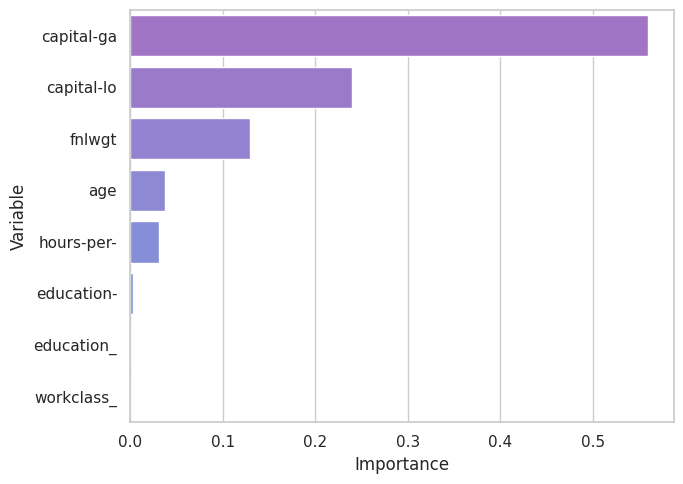

In [3]:
explainer.bar_plot(max_display=10)

### LIME

In [4]:
explainer = Explainer(based_on='feature_importance',
                      strategy_type='lime',
                      model_type='binary_classification',
                      model = model, 
                      x = X_test, 
                      y = y_pred)

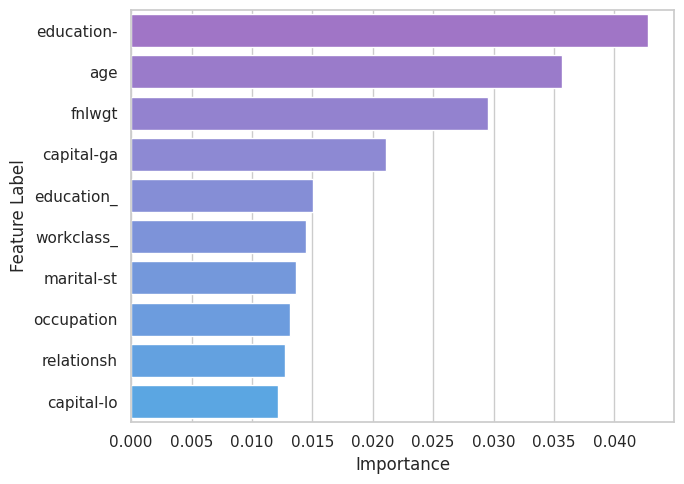

In [5]:
explainer.bar_plot(max_display=10)

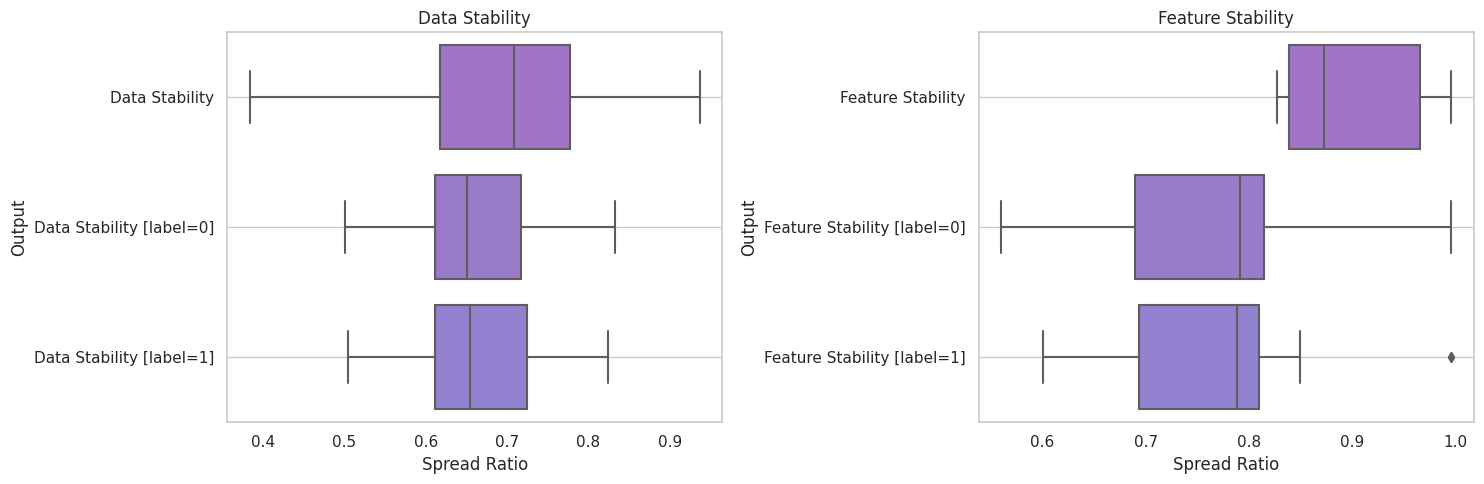

In [6]:
explainer.show_importance_stability(alpha=0.7)

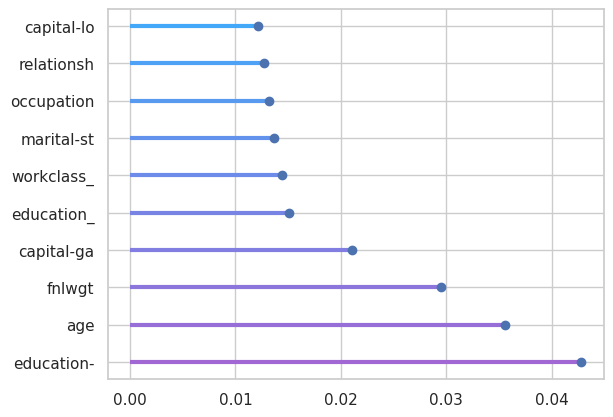

In [7]:
explainer.lolipop_plot(max_display=10)

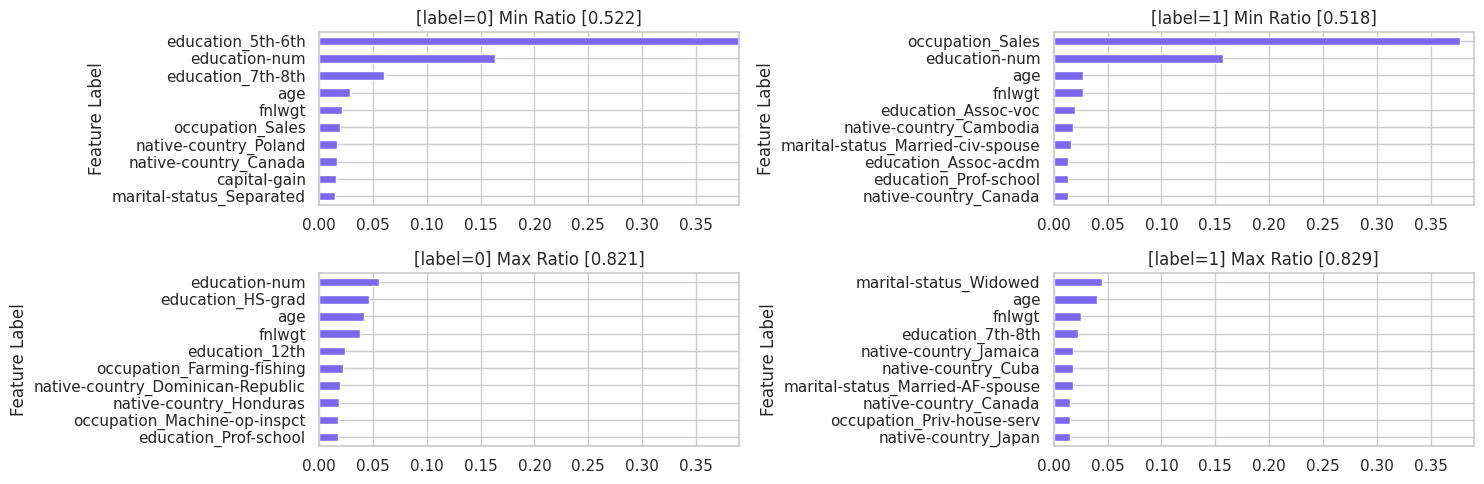

In [8]:
explainer.show_data_stability_boundaries(top_n=10, n_cols=2, figsize=(15,5))

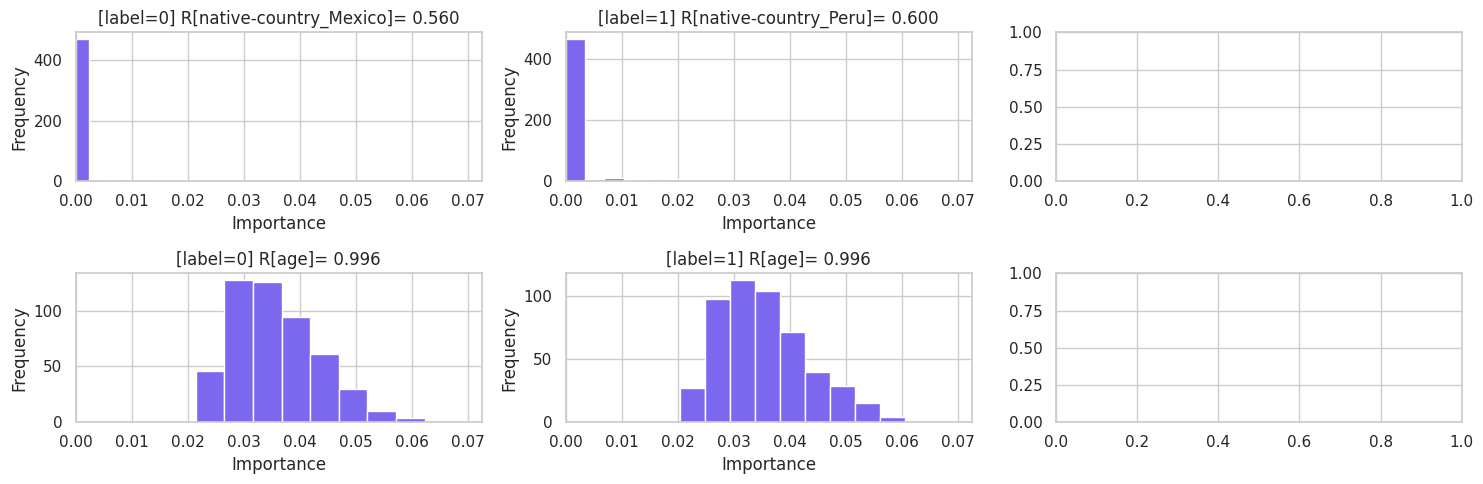

In [9]:
explainer.show_features_stability_boundaries(figsize=(15,5))